Regression Tree
Dataset: dt_reg.csv (200 rows, x → y with some noise).
Task: Fit DecisionTreeRegressor to predict y.
Compare RMSE with depths 2, 5, None.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dt_reg.csv')

In [3]:
df.shape

(200, 2)

In [4]:
df.columns

Index(['x', 'y'], dtype='object')

In [5]:
df.head()

,x,y
0,1.852278,143.450823
1,0.473592,54.639848
2,-1.230864,-84.442236
3,0.625667,59.326531
4,-0.072010,-8.244156


In [6]:
df.tail()

,x,y
195,0.232254,35.129879
196,-1.328186,-100.811171
197,1.538037,148.589259
198,-0.392108,-43.848026
199,0.968645,106.774557


In [7]:
df.isnull().sum()

x    0
y    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

x    0
y    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [11]:
df.describe()

,x,y
count,200.000000,200.000000
mean,-0.040771,-1.411682
std,0.931004,82.569433
min,-2.619745,-220.141941
25%,-0.705128,-61.564199
50%,-0.004192,1.512173
75%,0.500852,44.369055
max,2.720169,234.427000


In [12]:
df.dtypes

x    float64
y    float64
dtype: object

In [13]:
df.skew()

x    0.133476
y    0.155977
dtype: float64

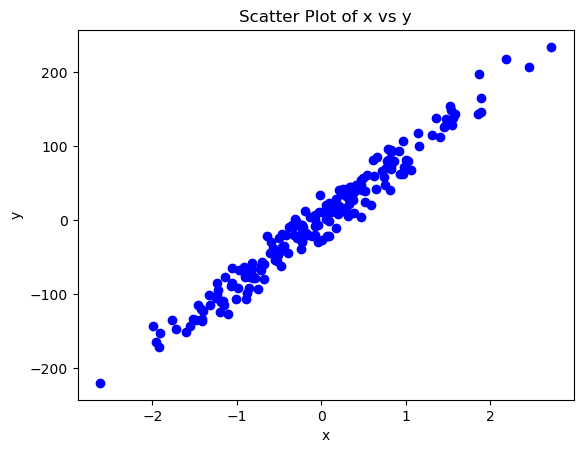

In [14]:

plt.scatter(df['x'], df['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y')
plt.show()

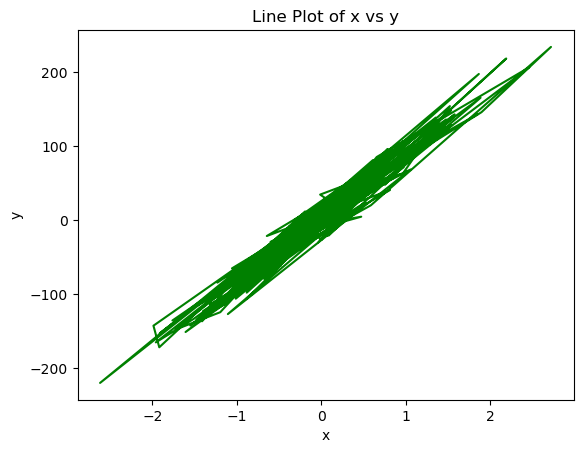

In [15]:
plt.plot(df['x'], df['y'], color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Plot of x vs y')
plt.show()


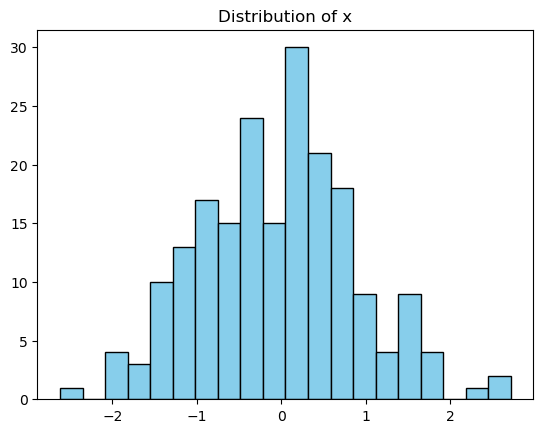

In [16]:
plt.hist(df['x'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of x')
plt.show()

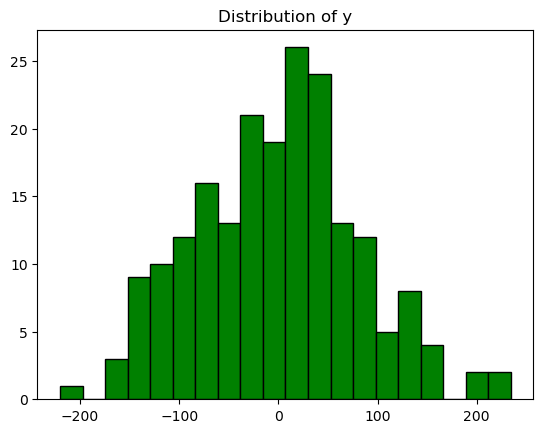

In [17]:
plt.hist(df['y'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of y')
plt.show()

C:\Users\boomi\AppData\Local\Temp\ipykernel_3988\2480576333.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['x'], df['y']], labels=['x', 'y'])
C:\Users\boomi\AppData\Local\Temp\ipykernel_3988\2480576333.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


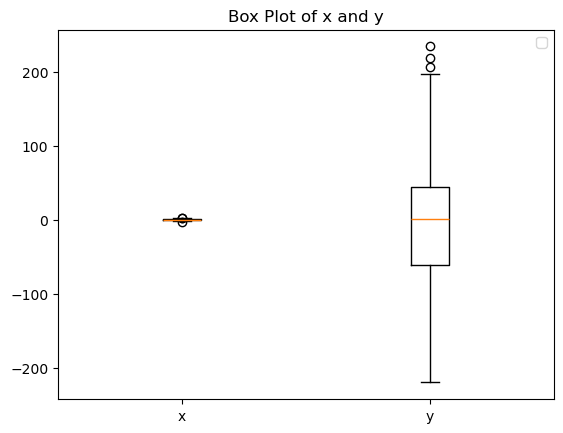

In [19]:
plt.boxplot([df['x'], df['y']], labels=['x', 'y'])
plt.title('Box Plot of x and y')
plt.legend()
plt.show()


In [22]:
df.corr()

,x,y
x,1.000000,0.983001
y,0.983001,1.000000


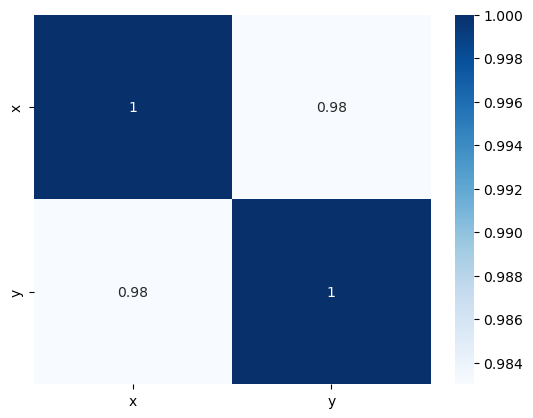

In [23]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
X=df.drop(columns='y')
y=df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for depth in [2, 5, None]:
    reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    print(f"Max Depth = {depth}, RMSE = {rmse:.3f}")


Max Depth = 2, RMSE = 40.534
Max Depth = 5, RMSE = 19.911
Max Depth = None, RMSE = 23.796
